In [ ]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2021` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cs285_f2021'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cs285_f2021'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

[Errno 2] No such file or directory: 'DRIVE_PYTHON_PATH'
/content


In [ ]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [917 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.lau

In [ ]:
#@title download mujoco

MJC_PATH = '{}/mujoco'.format(SYM_PATH)
if not os.path.exists(MJC_PATH):
  %mkdir $MJC_PATH
%cd $MJC_PATH
if not os.path.exists(os.path.join(MJC_PATH, 'mujoco200')):
  !wget -q https://www.roboti.us/download/mujoco200_linux.zip
  !unzip -q mujoco200_linux.zip
  %mv mujoco200_linux mujoco200
  %rm mujoco200_linux.zip

/content/gdrive/My Drive/cs285_f2021/mujoco


In [ ]:
#@title update mujoco paths

import os

os.environ['LD_LIBRARY_PATH'] += ':{}/mujoco200/bin'.format(MJC_PATH)
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '{}/mujoco200'.format(MJC_PATH)
os.environ['MUJOCO_PY_MJKEY_PATH'] = '{}/mjkey.txt'.format(MJC_PATH)

## installation on colab does not find *.so files
## in LD_LIBRARY_PATH, copy over manually instead
!cp $MJC_PATH/mujoco200/bin/*.so /usr/lib/x86_64-linux-gnu/

In [ ]:
!pip install gym
!pip install free-mujoco-py


     |████████████████████████████████| 14.1 MB 3.6 MB/s 
     |████████████████████████████████| 15.7 MB 58.7 MB/s 
     |████████████████████████████████| 203 kB 62.8 MB/s 
     |████████████████████████████████| 3.3 MB 51.3 MB/s 
     |████████████████████████████████| 4.3 MB 58.3 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21

**Here you need to restart the runtime**

In [ ]:
import mujoco_py

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

Ensure your `mjkey.txt` is in /content/cs285_f2021/mujoco before this step

In [ ]:
#@title clone homework repo
#@markdown Note that this is the same codebase from homework 1,
#@markdown so you may need to move your old `homework_fall2021`
#@markdown folder in order to clone the repo again.

#@markdown **Don't delete your old work though!**
#@markdown You will need it for this assignment.
#@title clone homework repo

%cd $SYM_PATH
!git clone https://github.com/TaoudiK/homework_fall2021.git
#!git clone https://github.com/berkeleydeeprlcourse/homework_fall2021.git
%cd homework_fall2021/hw2
%pip install -r requirements_colab.txt
%pip install -e .

/content/gdrive/My Drive/cs285_f2021
/content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw2
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1.6 MB 4.2 MB/s 
     |████████████████████████████████| 6.8 MB 20.9 MB/s 
     |████████████████████████████████| 216 kB 98.8 MB/s 
     |████████████████████████████████| 12.6 MB 24.3 MB/s 
     |████████████████████████████████| 750 kB 83.9 MB/s 
     |████████████████████████████████| 398 kB 46.7 MB/s 
     |████████████████████████████████| 552.8 MB 4.2 kB/s 
     |████████████████████████████████| 49.4 MB 295 kB/s 
     |████████████████████████████████| 448 kB 94.7 MB/s 
     |████████████████████████████████| 26.9 MB 1.3 MB/s 
  Created wheel for gym: filename=gym-0.17.2-py3-none-any.whl size=1650890 sha256=d28be2be6bf3db5989c52c8f6974e9cb61af96025e0a6b289fba4bbb5c5604af
  Stored in directory: /root/.cache/pip/wheels/18/e1/58/89a2aa24e6c2cc800204fc02010612afdf200926c4d6bfe315


Obtaining file:///content/gdrive/MyDrive/cs285_f2021/homework_fall2021/hw2
  Running setup.py develop for cs285


Import Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

/content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw2
cs285/           data/    README.md               requirements.txt
cs285.egg-info/  hw2.pdf  requirements_colab.txt  setup.py


## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cs285_f2021/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Policy Gradients

In [ ]:
#@title imports
import os
import time


from cs285.infrastructure.rl_trainer import RL_Trainer
from cs285.agents.pg_agent import PGAgent

%load_ext autoreload
%autoreload 2

In [ ]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  def __contains__(self, key):
    return hasattr(self, key)

  env_name =  'LunarLanderContinuous-v2'#@param
  exp_name = 'q3_b40000_r0.005' #@param

  #@markdown main parameters of interest
  n_iter = 100 #@param {type: "integer"}

  ## PDF will tell you how to set ep_len
  ## and discount for each environment
  ep_len =  1000#@param {type: "integer"}
  discount = 0.99 #@param {type: "number"}

  reward_to_go = True #@param {type: "boolean"}
  nn_baseline = True #@param {type: "boolean"}
  gae_lambda = None #@param {type: "number"}
  dont_standardize_advantages = True #@param {type: "boolean"}

  #@markdown batches and steps
  batch_size =  40000#@param {type: "integer"}
  eval_batch_size = 400 #@param {type: "integer"}

  num_agent_train_steps_per_iter = 1 #@param {type: "integer"}
  learning_rate =  0.005 #@param {type: "number"}

  #@markdown MLP parameters
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}

  #@markdown system
  save_params = False #@param {type: "boolean"}
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}
    
  action_noise_std = 0 #@param {type: "number"}

  #@markdown logging
  ## default is to not log video so
  ## that logs are small enough to be
  ## uploaded to gradscope
  video_log_freq =  -1#@param {type: "integer"}
  scalar_log_freq =  1#@param {type: "integer"}


args = Args()

## ensure compatibility with hw1 code
args['train_batch_size'] = args['batch_size']

if args['video_log_freq'] > 0:
  import warnings
  warnings.warn(
      '''\nLogging videos will make eventfiles too'''
      '''\nlarge for the autograder. Set video_log_freq = -1'''
      '''\nfor the runs you intend to submit.''')

In [ ]:
#@title create directory for logging

data_path = '''/content/cs285_f2021/''' \
            '''homework_fall2021/hw2/data'''

if not (os.path.exists(data_path)):
    os.makedirs(data_path)

logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

## define policy gradient trainer

class PG_Trainer(object):

    def __init__(self, params):

        #####################
        ## SET AGENT PARAMS
        #####################

        computation_graph_args = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            }

        estimate_advantage_args = {
            'gamma': params['discount'],
            'standardize_advantages': not(params['dont_standardize_advantages']),
            'reward_to_go': params['reward_to_go'],
            'nn_baseline': params['nn_baseline'],
            'gae_lambda': params['gae_lambda'],
        }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
        }

        agent_params = {**computation_graph_args, **estimate_advantage_args, **train_args}

        self.params = params
        self.params['agent_class'] = PGAgent
        self.params['agent_params'] = agent_params
        self.params['batch_size_initial'] = self.params['batch_size']

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):

        returnlist = self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
            )
        return returnlist

'1.19.5'

In [ ]:
## run training

print(args.logdir)
trainer = PG_Trainer(args)
returnlist_q3 = trainer.run_training_loop()
plt.plot(returnlist_q3)
plt.xlabel("Iteration")
plt.ylabel("Eval_AverageReturn")
plt.show()

/content/cs285_f2021/homework_fall2021/hw2/data/q3_b40000_r0.005_LunarLanderContinuous-v2_12-02-2022_09-28-12
########################
logging outputs to  /content/cs285_f2021/homework_fall2021/hw2/data/q3_b40000_r0.005_LunarLanderContinuous-v2_12-02-2022_09-28-12
########################
Using GPU id 0


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -166.3707275390625
Eval_StdReturn : 82.54906463623047
Eval_MaxReturn : -86.81157684326172
Eval_MinReturn : -310.42724609375
Eval_AverageEpLen : 84.0
Train_AverageReturn : -317.36083984375
Train_StdReturn : 160.43325805664062
Train_MaxReturn : -16.783126831054688
Train_MinReturn : -719.3888549804688
Train_AverageEpLen : 106.46684350132627
Train_EnvstepsSoFar : 40138
TimeSinceStart : 45.616265535354614
Training Loss : -18.078216552734375
Initial_DataCollection_AverageReturn : -317.36083984375
Done logging...




********** Iteration 1 ******

KeyboardInterrupt: ignored

Text(0, 0.5, 'Eval_AverageReturn')

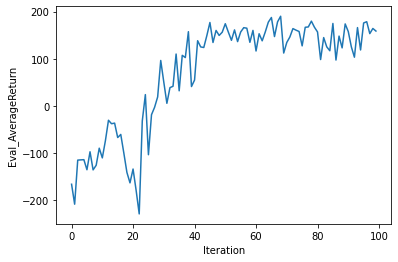

In [ ]:
plt.plot(returnlist_q3)
plt.xlabel("Iteration")
plt.ylabel("Eval_AverageReturn")

**EXPERIMENT 4** 

In [ ]:
args.__setitem__('env_name', 'HalfCheetah-v2')
args.__setitem__('dont_standardize_advantages', False)
args.__setitem__('reward_to_go',True)
args.__setitem__('ep_len',150)
args.__setitem__('discount',0.95)
args.__setitem__('size',32)
returnlist_q4 = []
for bs in [40000,50000]:
  args.__setitem__('batch_size',bs)
  for lr in [0.005, 0.01, 0.02]: 
    args.__setitem__('learning_rate',lr)
    trainer = PG_Trainer(args)
    returnlist_q4.append(trainer.run_training_loop())
    #plt.plot(returnlist_q4,label = '-b '+str(bs)+' -lr '+str(lr))
    
#plt.legend()
#plt.xlabel("Iteration")
#plt.ylabel("Eval_AverageReturn")
#plt.show()
plt.plot(returnlist_q4[0],label = '-b 40000 -lr 0.005 ')
plt.plot(returnlist_q4[1],label = '-b 40000 -lr 0.01')
plt.plot(returnlist_q4[2],label = '-b 40000 -lr 0.02 ')
plt.plot(returnlist_q4[3],label = '-b 50000 -lr 0.005 ')
plt.plot(returnlist_q4[4],label = '-b 50000 -lr 0.01')
plt.plot(returnlist_q4[5],label = '-b 50000 -lr 0.02')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Eval_AverageReturn")

########################
logging outputs to  /content/cs285_f2021/homework_fall2021/hw2/data/q3_b40000_r0.005_LunarLanderContinuous-v2_13-02-2022_03-45-23
########################
Using GPU id 0


/content/gdrive/MyDrive/cs285_f2021/homework_fall2021/hw2/cs285/infrastructure/rl_trainer.py:58: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/pyth



********** Iteration 0 ************


KeyboardInterrupt: ignored

In [ ]:
## PLOTS
list1 = [-78.454475, -119.67627, -49.37485, -51.355072, -81.37502, -60.337215, -62.617817, -76.3579, -38.184906, -36.54485, -55.04186, -45.02847, -90.90582, -70.138916, -45.765858, -80.13244, -50.61452, -63.64975, -67.0966, -54.198803, -34.902664, -38.46352, -50.237194, -73.33973, -33.140682, -50.10875, -40.98042, -61.112534, -40.119038, -36.108418, -48.879772, -54.214825, -51.31676, -32.51466, -37.560024, -34.88988, -64.09896, -58.695744, -33.224453, -29.036371, -27.937584, -39.665825, -48.189686, -35.445065, -39.44939, -37.505062, -31.632086, -30.679716, -24.231974, -29.967056, -38.497883, -21.38119, -42.38612, -37.711628, -20.476923, -41.43757, -32.21626, -27.356155, -23.37178, -17.01435, -16.816244, -29.828203, -16.284983, -12.423739, -11.67897, -19.603346, -0.8639397, -23.86511, 1.8390217, -11.484832, -22.776274, -29.8805, -9.847368, 8.165534, -4.8480783, -9.474499, -2.3090951, 1.4419837, 5.7192955, -20.008947, 36.72614, -12.816396, 23.450058, 6.826175, 8.136079, 27.633512, 33.6499, 26.743155, 0.18708356, 13.868909, 35.862644, 21.29215, 32.636913, 14.074425, 11.483505, 14.928413, 52.463596, 21.789366, 32.5751, 31.797165]

list2 = [-79.01881, -39.3371, -64.83871, -104.19981, -67.09941, -75.61907, -69.820915, -37.19251, -44.05238, -56.010105, -38.81062, -29.267382, -56.597565, -39.5224, -52.24989, -45.66382, -49.746494, -18.890541, -46.76012, -24.07099, -46.863148, -38.990437, -27.211554, -49.29491, -39.11411, -19.257088, -23.322456, -42.757458, -15.270328, -22.95487, -42.7323, -18.332235, -24.15332, -6.308741, -23.852533, -24.64444, -29.810156, -12.601922, -21.393332, -13.960845, -13.210998, -19.215538, -13.613678, -7.2110405, -6.8013825, -4.9887505, -9.63964, 6.579578, -5.026241, 14.591365, 7.842842, 30.848063, 32.707584, 37.362835, 34.56796, 28.718008, 34.473648, 45.56467, 53.05611, 58.55444, 37.35515, 39.638065, 57.843525, 74.98589, 49.899647, 66.66931, 68.398445, 52.683075, 92.30481, 78.70906, 90.745964, 83.98297, 66.50053, 77.75803, 97.035, 76.82943, 102.85833, 87.9421, 111.518715, 111.341736, 111.28701, 104.97346, 73.35534, 113.92014, 103.048134, 108.837585, 117.118126, 106.9226, 108.3019, 113.17753, 117.38766, 122.10718, 118.604576, 131.97383, 98.8832, 124.50516, 144.42712, 123.249695, 124.437904, 129.76328]

list3 = [-76.83278, -78.43427, -105.54871, -47.85248, -49.933777, -54.05595, -67.255516, -28.659178, -20.068956, -47.070156, -28.058372, -41.127766, -51.374218, -36.764797, -47.268204, -38.595356, -34.75096, -28.64769, -45.36079, -27.6427, -19.764063, -27.475271, -17.589273, -1.4980084, 4.1501355, -10.745327, -19.70295, -6.0925403, 17.779325, 14.171066, 21.278952, 21.195658, 19.299034, 24.391294, 11.782288, 22.237936, 24.992569, 30.489481, 42.78767, 52.978287, 53.85164, 42.8335, 42.815655, 90.33384, 69.88305, 58.787464, 97.70411, 55.746555, 79.069756, 70.5281, 90.0546, 89.251625, 98.910095, 68.77594, 91.678185, 99.87319, 88.29641, 99.549164, 123.999565, 123.514244, 123.52987, 132.38405, 122.88733, 122.15511, 108.04415, 109.41937, 119.51642, 129.37337, 134.62787, 129.61194, 142.39586, 127.58169, 136.49797, 117.05829, 142.89052, 124.172386, 139.2217, 141.38164, 145.59444, 127.322655, 151.24727, 142.5212, 133.62254, 125.80252, 137.16272, 146.0191, 140.47137, 127.140015, 139.4863, 138.65172, 144.08536, 117.20927, 163.06963, 140.98903, 103.47626, 97.01206, 118.75898, 117.989876, 133.45683, 111.97522]

list5 = [-60.974472, -67.98377, -40.79718, -94.0855, -83.76588, -53.362503, -99.32123, -76.58219, -51.896545, -48.516613, -52.299633, -60.391663, -39.486755, -27.971642, -34.589832, -19.709604, -28.807287, -29.465836, -26.924097, -34.960297, -36.87212, -22.995253, -40.52042, -30.181519, -30.444235, -30.768625, -33.644527, -41.09638, -17.215342, -29.094519, -11.629895, -19.310862, -29.620718, -27.154533, -4.7002387, -39.113037, -25.054556, -18.396597, -18.470795, -14.4234495, -5.002319, -4.6789985, -10.668316, 7.249678, 11.868054, 2.4697075, 6.9759383, 11.807548, 21.25604, 5.281534, 7.0933166, 33.400158, 33.989643, 33.717766, 56.269276, 39.280838, 33.96863, 51.443405, 42.386127, 59.974445, 61.940014, 68.45978, 61.924652, 89.185616, 85.70644, 62.510975, 64.49325, 67.646484, 89.21192, 94.45739, 101.65685, 64.42594, 89.69342, 88.009705, 88.50942, 104.96769, 88.76904, 91.06312, 95.3649, 88.11979, 115.7308, 100.60789, 122.14081, 112.4797, 121.32175, 121.15005, 116.47933, 88.9223, 124.409584, 105.12567, 103.96924, 108.79781, 131.83662, 128.01395, 125.3818, 123.14037, 144.52043, 124.52359, 134.15306, 135.98112]
list6 = [-63.85965, -89.677086, -60.586456, -47.08018, -63.309193, -80.88764, -87.20902, -63.681213, -42.929317, -54.346252, -18.384836, -21.417603, -58.5018, -36.188488, 3.6905015, -34.351765, -40.989952, -22.778831, -31.924505, -18.527023, -17.612137, -5.176965, -33.620472, -4.003021, 10.5538025, -25.378489, 15.536449, 1.9113144, 12.3405, 24.640238, 2.2293026, 24.206553, 32.52505, 6.96211, 49.422012, 36.500443, 43.769516, 48.35214, 57.06821, 39.216038, 72.42856, 63.191174, 57.44576, 73.036255, 58.283615, 79.36168, 91.04148, 76.1471, 69.7333, 78.37177, 103.717896, 93.057884, 71.401375, 95.48238, 81.78745, 82.909904, 76.85016, 68.89817, 89.987495, 100.786766, 117.66174, 100.309074, 97.94718, 127.14854, 108.035194, 106.88462, 121.83246, 126.314354, 116.552246, 84.81601, 107.88918, 128.80884, 116.569824, 108.14327, 113.03002, 116.43607, 115.88092, 130.27272, 141.9363, 130.13751, 132.10266, 131.06056, 83.993355, 133.45607, 139.76964, 128.92488, 96.712585, 128.53651, 147.20787, 132.91425, 146.21394, 141.1604, 122.990486, 117.63208, 132.79088, 125.28249, 134.67818, 134.42488, 139.99269, 129.57803]

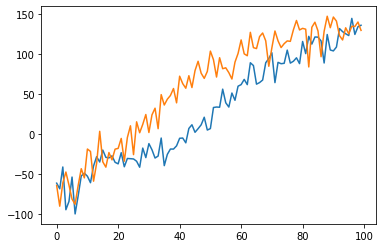

In [ ]:
plt.plot(list5)
plt.plot(list6)

In [ ]:

args.__setitem__('batch_size',40000)

args.__setitem__('learning_rate',0.02)

## NO RTG NO NN_BASELINE
args.__setitem__('reward_to_go',False)
args.__setitem__('nn_baseline',False)
trainer = PG_Trainer(args)
returnlist_q41 = trainer.run_training_loop()

## RTG
args.__setitem__('reward_to_go',True)
args.__setitem__('nn_baseline',False)
trainer = PG_Trainer(args)
returnlist_q42 = trainer.run_training_loop()

## NN_BASELINE
args.__setitem__('reward_to_go',False)
args.__setitem__('nn_baseline',True)
trainer = PG_Trainer(args)
returnlist_q43 = trainer.run_training_loop()

## BOTH RTG AND NN_BASELINE
args.__setitem__('reward_to_go',True)
args.__setitem__('nn_baseline',True)
trainer = PG_Trainer(args)
returnlist_q44 = trainer.run_training_loop()

#PLOTS
plt.plot(returnlist_q41,label = 'none')
plt.plot(returnlist_q42,label = '-rtg')
plt.plot(returnlist_q43,label = '-nn_baseline')
plt.plot(returnlist_q44,label = '-rtg -nn_baseline')
plt.legend()
plt.show()

########################
logging outputs to  /content/cs285_f2021/homework_fall2021/hw2/data/q3_b40000_r0.005_LunarLanderContinuous-v2_14-02-2022_11-09-02
########################
Using GPU id 0


********** Iteration 0 ************


KeyboardInterrupt: ignored

In [ ]:
plt.plot(returnlist_q41,label = 'none')
plt.plot(returnlist_q42,label = '-rtg')
plt.plot(returnlist_q43,label = '-nn_baseline')
plt.plot(returnlist_q44,label = '-rtg -nn_baseline')
plt.legend()

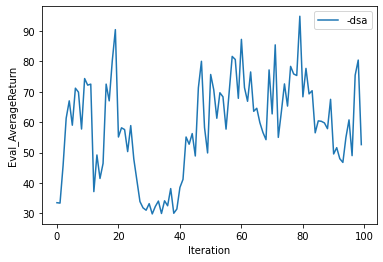

In [ ]:
plt.plot(returnlist_dsa,label = '-dsa')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Eval_AverageReturn")
plt.show()


**EXPERIMENT 5**

In [ ]:
args.__setitem__('env_name', 'Hopper-v2')
args.__setitem__('dont_standardize_advantages', False)
args.__setitem__('batch_size', 2000)
args.__setitem__('reward_to_go',True)
args.__setitem__('ep_len',1000)
args.__setitem__('discount',0.99)
args.__setitem__('size',32)


In [ ]:
args.__setitem__('dont_standardize_advantages', True)
args.__setitem__('reward_to_go',True)
## run training

print(args.logdir)
trainer = PG_Trainer(args)
returnlist_rtg_dsa = trainer.run_training_loop()

/content/cs285_f2021/homework_fall2021/hw2/data/q3_b40000_r0.005_LunarLanderContinuous-v2_14-02-2022_11-09-02
########################
logging outputs to  /content/cs285_f2021/homework_fall2021/hw2/data/q3_b40000_r0.005_LunarLanderContinuous-v2_14-02-2022_11-09-02
########################
Using GPU id 0


********** Iteration 0 ************


IndexError: ignored

In [ ]:
plt.plot(returnlist_rtg_dsa,label = '-nn_baseline')
plt.xlabel("Iteration")
plt.ylabel("Eval_AverageReturn")

/content/cs285_f2021/homework_fall2021/hw2/data/q1_sb_no_rtg_dsa_CartPole-v0_11-02-2022_15-27-34
########################
logging outputs to  /content/cs285_f2021/homework_fall2021/hw2/data/q1_sb_no_rtg_dsa_CartPole-v0_11-02-2022_15-27-34
########################
Using GPU id 0


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 32.61538314819336
Eval_StdReturn : 19.22553825378418
Eval_MaxReturn : 70.0
Eval_MinReturn : 11.0
Eval_AverageEpLen : 32.61538461538461
Train_AverageReturn : 25.65816307067871
Train_StdReturn : 14.328168869018555
Train_MaxReturn : 132.0
Train_MinReturn : 8.0
Train_AverageEpLen : 25.658163265306122
Train_EnvstepsSoFar : 5029
TimeSinceStart : 3.0159225463867188
Training Loss : -0.005392853170633316
Initial_DataCollection_AverageReturn : 25.65816307067871
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...



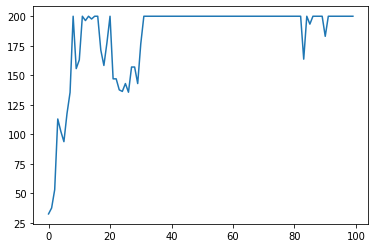

In [ ]:

print(args.logdir)
trainer = PG_Trainer(args)
returnlist_rtg = trainer.run_training_loop()

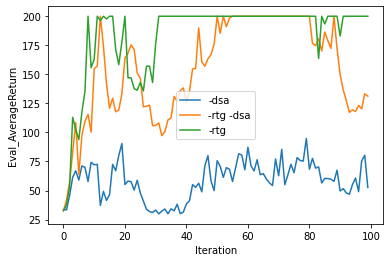

In [ ]:
plt.plot(returnlist_dsa,label = '-dsa')
plt.plot(returnlist_rtg_dsa,label = '-rtg -dsa')
plt.plot(returnlist_rtg,label = '-rtg')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Eval_AverageReturn")
plt.show()

EXPERIMENT 2

In [ ]:
args.__setitem__('env_name', 'InvertedPendulum-v2')
args.__setitem__('dont_standardize_advantages', False)
args.__setitem__('reward_to_go',True)
args.__setitem__('ep_len',1000)
args.__setitem__('discount',0.9)
args.__setitem__('batch_size',300)
args.__setitem__('learning_rate',1e-2)
print(args.logdir)
trainer = PG_Trainer(args)
returnlist_rtg = trainer.run_training_loop()

/content/cs285_f2021/homework_fall2021/hw2/data/q1_sb_no_rtg_dsa_CartPole-v0_11-02-2022_16-04-41
########################
logging outputs to  /content/cs285_f2021/homework_fall2021/hw2/data/q1_sb_no_rtg_dsa_CartPole-v0_11-02-2022_16-04-41
########################
Using GPU id 0


ValueError: ignored